<a href="https://colab.research.google.com/github/MariaSanSal/Tarea_PIA07/blob/main/tarea_pia07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea online PIA07
##Programación de una Red Neuronal Convolucional
##Apartado 1: Carga el dataset y prepara los datos







In [1]:
import tensorflow as tf
from tensorflow import keras
from tf_keras.datasets import mnist #this library contains a lot of ML datasets including the MNIST one
from keras import optimizers
from tf_keras.models import Sequential
from tf_keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense


import numpy as np

input_shape = (28, 28, 6)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#(train_data, train_labels), (test_data, test_labels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
test_data = X_test.astype('float32')

X_train /= 255
test_data /= 255
y_train, y_test = y_train.flatten(), y_test.flatten()

In [2]:
print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


In [3]:
from tf_keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)
class_names = ["0","1","2","3","4","5","6","7","8","9"]

10


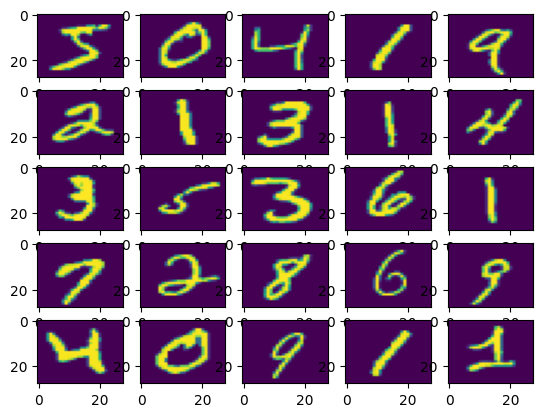

In [4]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1

plt.show()

##Apartado 2: Crea el modelo convolucional
* Crea un modelo con una o varias capas Conv2D.
* Utiliza también capas max-pooling o strides que mantengan las dimensiones de la red bajo control.
* Recuerda añadir una capa neuronal interna y una capa neuronal de salida, con tantas neuronas como clases de salida necesitamos.


In [5]:
import keras
model = Sequential()
#model.add(Conv2D(28,kernel_size=(5,5), input_shape =input_shape,activation="sigmoid"))
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(28, kernel_size=(5,5),activation="sigmoid"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
#model.add(Dense(120,activation="sigmoid"))
model.add(Dense(84,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 28)        22428     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 28)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 700)               0         
                                                                 
 dropout (Dropout)           (None, 700)               0

In [6]:
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy',metrics=['acc'])
model.fit(X_train, y_train, batch_size=256, epochs = 10, validation_data = (X_test, y_test))


Epoch 1/10
235/235 [==============================] - 69s 288ms/step - loss: 0.9469 - acc: 0.7294 - val_loss: 0.2630 - val_acc: 0.9353
Epoch 2/10
235/235 [==============================] - 66s 282ms/step - loss: 0.2457 - acc: 0.9344 - val_loss: 0.1346 - val_acc: 0.9607
Epoch 3/10
235/235 [==============================] - 67s 285ms/step - loss: 0.1568 - acc: 0.9557 - val_loss: 0.0961 - val_acc: 0.9703
Epoch 4/10
235/235 [==============================] - 69s 292ms/step - loss: 0.1210 - acc: 0.9649 - val_loss: 0.0782 - val_acc: 0.9765
Epoch 5/10
235/235 [==============================] - 80s 339ms/step - loss: 0.1016 - acc: 0.9701 - val_loss: 0.0681 - val_acc: 0.9796
Epoch 6/10
235/235 [==============================] - 68s 287ms/step - loss: 0.0914 - acc: 0.9728 - val_loss: 0.0685 - val_acc: 0.9789
Epoch 7/10
235/235 [==============================] - 71s 303ms/step - loss: 0.0825 - acc: 0.9745 - val_loss: 0.0591 - val_acc: 0.9818
Epoch 8/10
235/235 [==============================] - 7

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0520 - acc: 0.9837

Test accuracy: 0.9836999773979187


In [9]:
import matplotlib.pyplot as plt
predictions=model.predict(X_test)

313/313 [==============================] - 4s 11ms/step


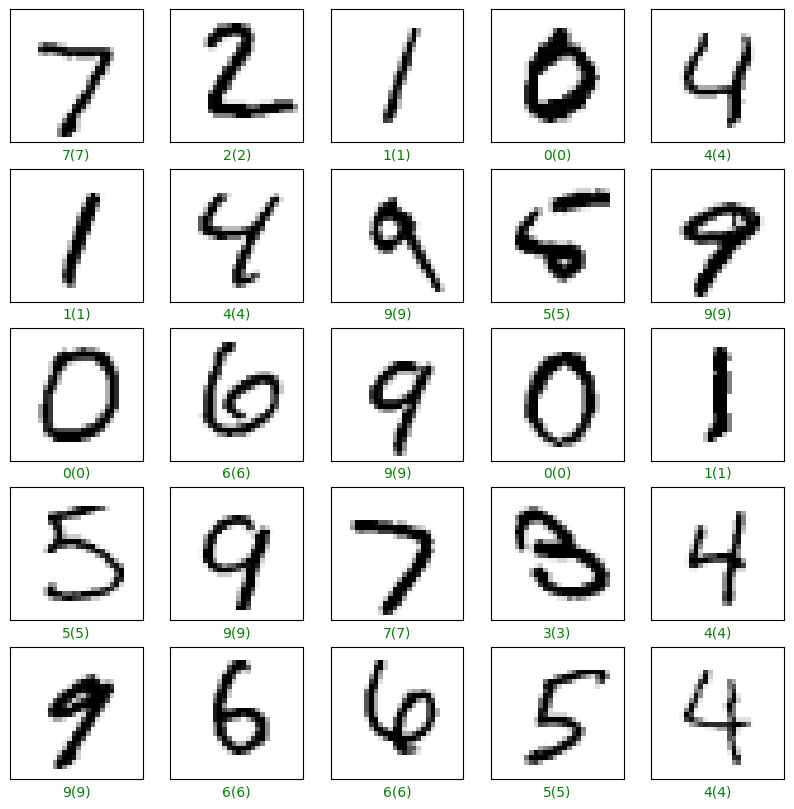

In [10]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i],cmap=plt.cm.binary)
  predicted_label=np.argmax(predictions[i])
  true_label=y_test[i].argmax()
  if predicted_label==true_label:
    color='green'
  else:
    color='red'
  plt.xlabel("{}({})".format(class_names[predicted_label],class_names[true_label]),color=color)